In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import warnings #warning 무시하기
warnings.filterwarnings('ignore')

In [188]:
from sklearn.datasets import load_boston

In [189]:
boston = load_boston()

In [190]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [191]:
data = boston.data
label = boston.target
columns = boston.feature_names

In [192]:
data = pd.DataFrame(data,columns = columns)

In [193]:
data.head() #앞부분 5개

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [194]:
data.shape

(506, 13)

In [195]:
#Simple Linear Regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=2022)

In [196]:
X_train['RM']#RM은 1차원이기에 sklearn에서 학습이 안된다.

256    7.454
288    6.315
318    6.382
136    5.942
233    8.247
       ...  
177    6.315
112    5.913
173    6.416
220    6.951
381    6.545
Name: RM, Length: 404, dtype: float64

In [197]:
# 그러므로 2차원으로 바꾼다.
# ********** -1,1의 비밀을 이해해야함 *********
X_train['RM'].values.reshape(-1,1)[:5] #-1은 시작점에서 하나 빼서 끝점으로 이동한다.즉 reshape(-1,1)은 전체 길이만큼 2차원으로 변경

array([[7.454],
       [6.315],
       [6.382],
       [5.942],
       [8.247]])

In [198]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

In [199]:
sim_lr.fit(X_train['RM'].values.reshape(-1,1),y_train) 

LinearRegression()

In [200]:
y_pred = sim_lr.predict(X_test['RM'].values.reshape(-1,1)) #룸의 갯수로 예측

In [201]:
# 결과 살펴보기
from sklearn.metrics import r2_score
print('단순 선형 회귀, R2: {:.4f}'.format(r2_score(y_test, y_pred))) # :.4f : 전체 숫자를 표현하는데 소수점 4자리까지 표시 

단순 선형 회귀, R2: 0.2121


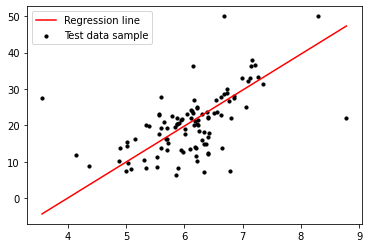

In [202]:
#결과 시각화 하기
#x는 방의 개수, y는 가격
line_x = np.linspace(np.min(X_test['RM']), np.max(X_test['RM']),10) #좌표 생성 : 최소, 최대, 점찍을 개수
line_y = sim_lr.predict(line_x.reshape(-1,1))

plt.scatter(X_test['RM'], y_test, s=10, c='k')
plt.plot(line_x, line_y, c='r')
plt.legend(['Regression line', 'Test data sample'], loc='upper left')

방의 개수로만 가격을 예측하기에는 부족하다.

In [203]:
# Multiple Linear Regression
# RM만 사용하는 것이 아닌 전체 컬럼을 사용한다.
mul_lr = LinearRegression()
mul_lr.fit(X_train, y_train) #예측

LinearRegression()

In [204]:
y_pred = mul_lr.predict(X_test) #테스트용 데이터로 테스트

In [205]:
print('다중 선형 회귀, R2 : {:.4f}'.format(r2_score(y_test, y_pred)) )

다중 선형 회귀, R2 : 0.6226


Decision Tree Regressor (결정 트리)

In [206]:
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth = 4) #몇 단계까지 내려갈 지 설정, depth를 높이면 학습 데이터에 밀착된다. 그래서 Overfitting이 일어난다.

In [207]:
dt_regr.fit(X_train['RM'].values.reshape((-1,1)),y_train)

DecisionTreeRegressor(max_depth=4)

In [208]:
y_pred = dt_regr.predict(X_test['RM'].values.reshape(-1,1))

In [209]:
print('단순 결정 트리 회귀 R2: {:.4f}'.format(r2_score(y_test, y_pred)))

단순 결정 트리 회귀 R2: 0.3816


In [210]:
#10번 반복
arr = np.arange(1,11)
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [211]:
best_depth = 0
best_r2 = 0

for depth in arr:
  dt_regr = DecisionTreeRegressor(max_depth = depth)
  dt_regr.fit(X_train['RM'].values.reshape((-1,1)),y_train)
  y_pred = dt_regr.predict(X_test['RM'].values.reshape(-1,1))
  temp_r2 = r2_score(y_test, y_pred)
  print('단순 결정 트리 회귀 depth = {} R2: {:.4f}\n'.format(depth,r2_score(y_test, y_pred)))
  
  if best_r2 < temp_r2:
    best_depth = depth
    best_r2 = temp_r2

print('최적의 결과는 depth : {}, r2 : {:.4f}'.format(best_depth, best_r2))

단순 결정 트리 회귀 depth = 1 R2: 0.2459

단순 결정 트리 회귀 depth = 2 R2: 0.3547

단순 결정 트리 회귀 depth = 3 R2: 0.3931

단순 결정 트리 회귀 depth = 4 R2: 0.3816

단순 결정 트리 회귀 depth = 5 R2: 0.3247

단순 결정 트리 회귀 depth = 6 R2: 0.3474

단순 결정 트리 회귀 depth = 7 R2: 0.3164

단순 결정 트리 회귀 depth = 8 R2: 0.3368

단순 결정 트리 회귀 depth = 9 R2: 0.3098

단순 결정 트리 회귀 depth = 10 R2: 0.2579

최적의 결과는 depth : 3, r2 : 0.3931


In [212]:
# 전체 컬럼 사용
dt_regr = DecisionTreeRegressor(max_depth = 10)
dt_regr.fit(X_train, y_train)

y_pred = dt_regr.predict(X_test)
print('다중 결정 트리 R2 : {:.4f}'.format(r2_score(y_test,y_pred)))

다중 결정 트리 R2 : 0.7275


Support Vector machine Regressor

In [213]:
from sklearn.svm import SVR
svm_regr = SVR(C=1) #C는 어느정도 일반화 시킬지
svm_regr.fit(X_train['RM'].values.reshape(-1,1), y_train)

SVR(C=1)

In [214]:
y_pred = svm_regr.predict(X_test['RM'].values.reshape(-1,1))


In [215]:
print('단순 서포트 벡터 머신 회귀 R2: {:.4f}'.format(r2_score(y_test,y_pred)))

단순 서포트 벡터 머신 회귀 R2: 0.3763


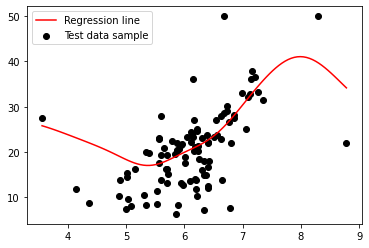

In [216]:
#결과의 시각화
line_x = np.linspace(np.min(X_test['RM']), np.max(X_test['RM']), 100)
line_y = svm_regr.predict(line_x.reshape(-1,1))

plt.scatter(X_test['RM'], y_test, c='k')
plt.plot(line_x, line_y,c = 'red')
plt.legend(['Regression line', 'Test data sample'], loc = 'upper left')

In [217]:
arr = np.arange(1,101)

In [218]:
best_C = 0
best_R2 = 0
for c in arr:
  svm_regr = SVR(C=c)
  svm_regr.fit(X_train, y_train)
  y_pred = svm_regr.predict(X_test)
  temp = r2_score(y_test,y_pred)
  print('단순 서포트 벡터 머신 회귀 C : {}, R2: {:.4f}'.format(c,r2_score(y_test,y_pred)))
  if best_R2<temp:
    best_C = c
    best_R2 = temp
print('최적의 결과는 C : {}, r2 : {:.4f}'.format(best_C, best_R2))

  

단순 서포트 벡터 머신 회귀 C : 1, R2: 0.3081
단순 서포트 벡터 머신 회귀 C : 2, R2: 0.3240
단순 서포트 벡터 머신 회귀 C : 3, R2: 0.3365
단순 서포트 벡터 머신 회귀 C : 4, R2: 0.3448
단순 서포트 벡터 머신 회귀 C : 5, R2: 0.3535
단순 서포트 벡터 머신 회귀 C : 6, R2: 0.3607
단순 서포트 벡터 머신 회귀 C : 7, R2: 0.3664
단순 서포트 벡터 머신 회귀 C : 8, R2: 0.3714
단순 서포트 벡터 머신 회귀 C : 9, R2: 0.3774
단순 서포트 벡터 머신 회귀 C : 10, R2: 0.3825
단순 서포트 벡터 머신 회귀 C : 11, R2: 0.3877
단순 서포트 벡터 머신 회귀 C : 12, R2: 0.3919
단순 서포트 벡터 머신 회귀 C : 13, R2: 0.3959
단순 서포트 벡터 머신 회귀 C : 14, R2: 0.3997
단순 서포트 벡터 머신 회귀 C : 15, R2: 0.4045
단순 서포트 벡터 머신 회귀 C : 16, R2: 0.4091
단순 서포트 벡터 머신 회귀 C : 17, R2: 0.4134
단순 서포트 벡터 머신 회귀 C : 18, R2: 0.4162
단순 서포트 벡터 머신 회귀 C : 19, R2: 0.4199
단순 서포트 벡터 머신 회귀 C : 20, R2: 0.4234
단순 서포트 벡터 머신 회귀 C : 21, R2: 0.4275
단순 서포트 벡터 머신 회귀 C : 22, R2: 0.4330
단순 서포트 벡터 머신 회귀 C : 23, R2: 0.4366
단순 서포트 벡터 머신 회귀 C : 24, R2: 0.4387
단순 서포트 벡터 머신 회귀 C : 25, R2: 0.4405
단순 서포트 벡터 머신 회귀 C : 26, R2: 0.4425
단순 서포트 벡터 머신 회귀 C : 27, R2: 0.4460
단순 서포트 벡터 머신 회귀 C : 28, R2: 0.4489
단순 서포트 벡터 머신 회귀 C : 29, R2: 0